[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harikiran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harikiran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✅ SVM Model Accuracy: 0.98
✅ SVM Model and Vectorizer Saved!


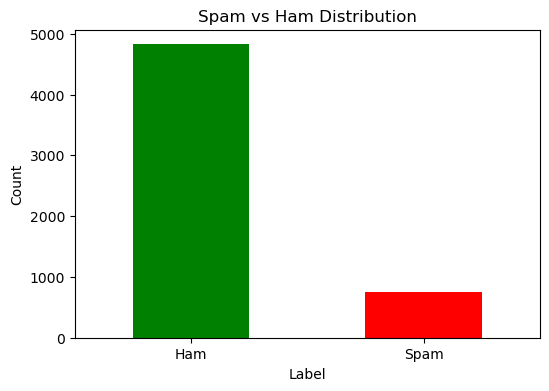

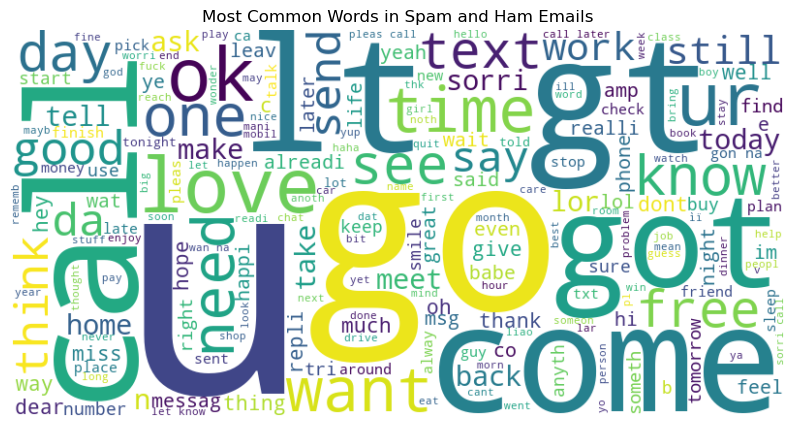

In [ ]:
import pandas as pd  
import pickle  
import string  
import nltk  
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer  
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score  
from sklearn.svm import SVC  
import matplotlib.pyplot as plt  

nltk.download('stopwords')  
nltk.download('punkt')  

df = pd.read_csv("spam.csv", encoding="latin-1")  
df = df[['v1', 'v2']]  
df.columns = ['label', 'text']  
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  

ps = PorterStemmer()  

def preprocess_text(text):  
    text = text.lower()  
    text = nltk.word_tokenize(text)  
    text = [word for word in text if word.isalnum()]  
    text = [word for word in text if word not in stopwords.words('english') and word not in string.punctuation]  
    text = [ps.stem(word) for word in text]  
    return " ".join(text)  

df['text'] = df['text'].apply(preprocess_text)  

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)  

vectorizer = TfidfVectorizer()  
X_train_tfidf = vectorizer.fit_transform(X_train)  
X_test_tfidf = vectorizer.transform(X_test)  

model_svm = SVC(kernel='linear', random_state=42)  
model_svm.fit(X_train_tfidf, y_train)  

y_pred = model_svm.predict(X_test_tfidf)  
accuracy = accuracy_score(y_test, y_pred)  
print(f"✅ SVM Model Accuracy: {accuracy:.2f}")  

with open("model_svm.pkl", "wb") as f:  
    pickle.dump(model_svm, f)  

with open("vectorizer.pkl", "wb") as f:  
    pickle.dump(vectorizer, f)  

print("✅ SVM Model and Vectorizer Saved!")  

spam_counts = df['label'].value_counts()
plt.figure(figsize=(6, 4))
spam_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Spam vs Ham Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks([0, 1], ['Ham', 'Spam'], rotation=0)
plt.show()


from wordcloud import WordCloud
all_words = " ".join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Spam and Ham Emails')
plt.show()


In [1]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_test, y_pred)
print("📊 Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("📝 Confusion Matrix:\n", conf_matrix)


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.86      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

📝 Confusion Matrix:
 [[962   3]
 [ 21 129]]
